In [7]:
# Step 1: Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Step 2: Load the saved training and testing data
train_data = pd.read_csv("train_multi_output.csv")
test_data = pd.read_csv("test_multi_output.csv")

# Step 3: Separate features (X) and target variables (y)
X_train = train_data[['Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 'Wind_speed', 'Humidity', 'Temperature']]
y_train = train_data[['PV_production', 'Wind_production']]

X_test = test_data[['Season', 'Day_of_the_week', 'DHI', 'DNI', 'GHI', 'Wind_speed', 'Humidity', 'Temperature']]
y_test = test_data[['PV_production', 'Wind_production']]

In [8]:
# Step 5: Initialize and train the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,       # number of trees (try 100-500)
    max_depth=None,         # let trees expand fully
    random_state=42,
    n_jobs=-1               # use all CPU cores for faster training
)

rf_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = rf_model.predict(X_test)

In [9]:
# Step 7: Evaluate PV production
mae_pv = mean_absolute_error(y_test['PV_production'], y_pred[:, 0])
mse_pv = mean_squared_error(y_test['PV_production'], y_pred[:, 0])
rmse_pv = np.sqrt(mse_pv)
r2_pv = r2_score(y_test['PV_production'], y_pred[:, 0])

# Calculate Adjusted R² for PV Production
n_pv = len(y_test['PV_production'])  # number of data points
p_pv = X_train.shape[1]  # number of features
adjusted_r2_pv = 1 - ((1 - r2_pv) * (n_pv - 1)) / (n_pv - p_pv - 1)

# Step 8: Evaluate Wind production
mae_wind = mean_absolute_error(y_test['Wind_production'], y_pred[:, 1])
mse_wind = mean_squared_error(y_test['Wind_production'], y_pred[:, 1])
rmse_wind = np.sqrt(mse_wind)
r2_wind = r2_score(y_test['Wind_production'], y_pred[:, 1])

# Calculate Adjusted R² for Wind Production
n_wind = len(y_test['Wind_production'])  # number of data points
p_wind = X_train.shape[1]  # number of features
adjusted_r2_wind = 1 - ((1 - r2_wind) * (n_wind - 1)) / (n_wind - p_wind - 1)

# Print the results
print("----- Random Forest Results -----")
print(f"PV Production -> MAE: {mae_pv:.3f}, MSE: {mse_pv:.3f}, RMSE: {rmse_pv:.3f}, R²: {r2_pv:.3f}, Adjusted R²: {adjusted_r2_pv:.3f}")
print(f"Wind Production -> MAE: {mae_wind:.3f}, MSE: {mse_wind:.3f}, RMSE: {rmse_wind:.3f}, R²: {r2_wind:.3f}, Adjusted R²: {adjusted_r2_wind:.3f}")


----- Random Forest Results -----
PV Production -> MAE: 0.016, MSE: 0.002, RMSE: 0.039, R²: 0.986, Adjusted R²: 0.986
Wind Production -> MAE: 0.024, MSE: 0.002, RMSE: 0.048, R²: 0.956, Adjusted R²: 0.956


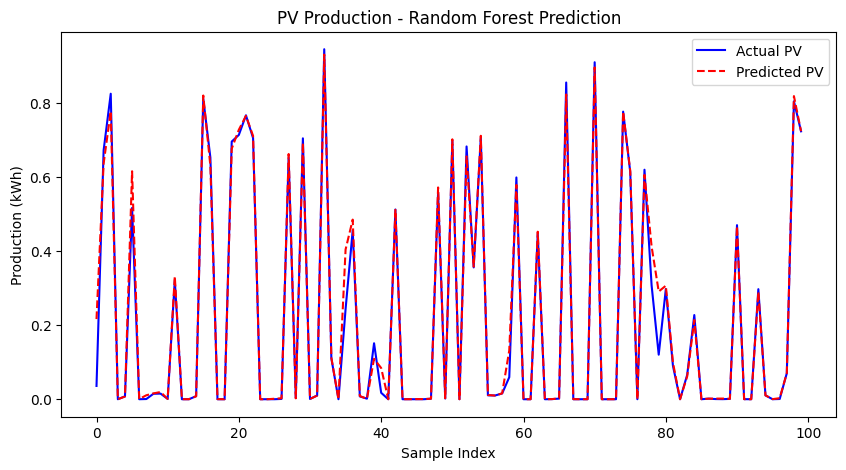

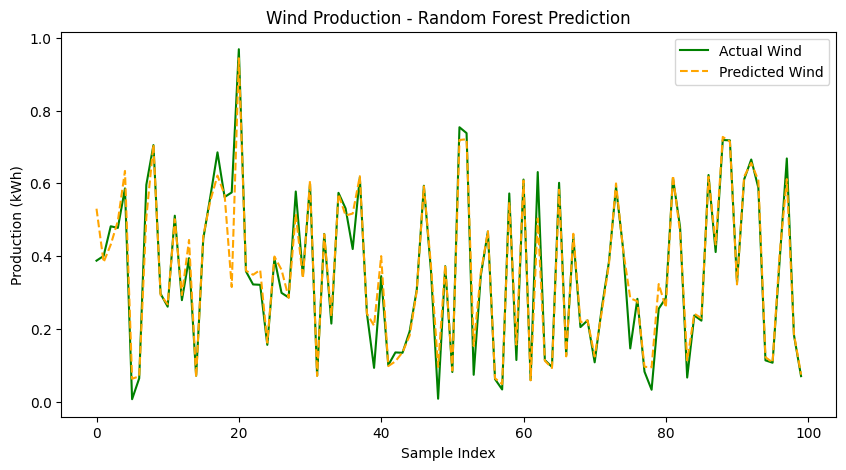

In [10]:
# PV Production Plot
plt.figure(figsize=(10,5))
plt.plot(y_test['PV_production'].values[:100], label='Actual PV', color='blue')
plt.plot(y_pred[:100, 0], label='Predicted PV', linestyle='--', color='red')
plt.title('PV Production - Random Forest Prediction')
plt.xlabel('Sample Index')
plt.ylabel('Production (kWh)')
plt.legend()
plt.show()

# Wind Production Plot
plt.figure(figsize=(10,5))
plt.plot(y_test['Wind_production'].values[:100], label='Actual Wind', color='green')
plt.plot(y_pred[:100, 1], label='Predicted Wind', linestyle='--', color='orange')
plt.title('Wind Production - Random Forest Prediction')
plt.xlabel('Sample Index')
plt.ylabel('Production (kWh)')
plt.legend()
plt.show()


Feature Importances:
           Feature  Importance
4              GHI    0.574990
6         Humidity    0.121640
5       Wind_speed    0.096998
7      Temperature    0.069203
0           Season    0.065439
1  Day_of_the_week    0.038624
2              DHI    0.016892
3              DNI    0.016214


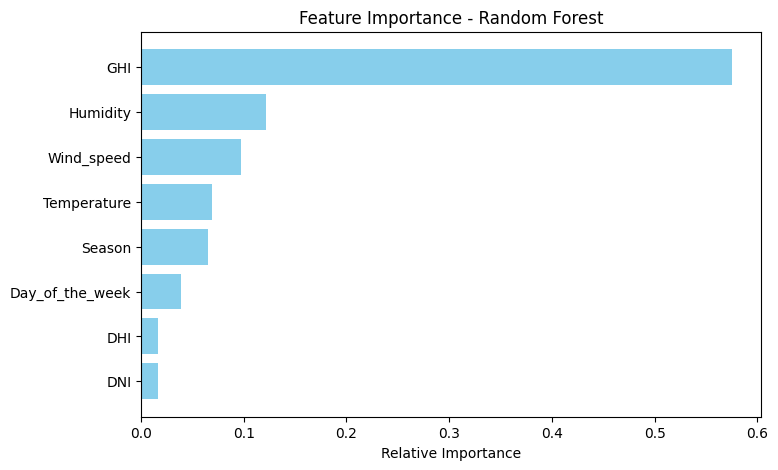

In [11]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

# Plot
plt.figure(figsize=(8,5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest")
plt.xlabel("Relative Importance")
plt.show()
